In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:

iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['target']=iris.target

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = data[data['target'] != 0][['sepal width (cm)','petal length (cm)','target']]

In [7]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


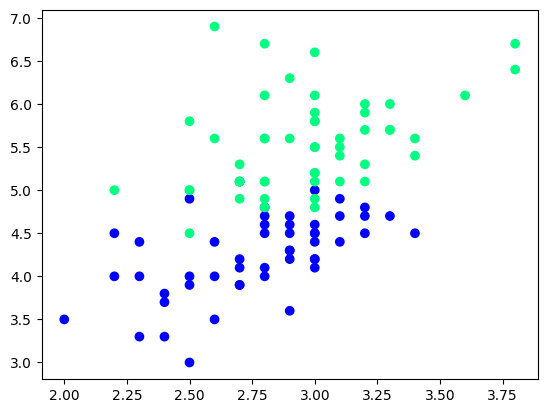

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'],cmap='winter')

In [9]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),target
91,3.0,4.6,1
86,3.1,4.7,1
53,2.3,4.0,1
94,2.7,4.2,1
89,2.5,4.0,1
61,3.0,4.2,1
98,2.5,3.0,1
104,3.0,5.8,2
97,2.9,4.3,1
95,3.0,4.2,1


In [10]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [11]:
df_train

,sepal width (cm),petal length (cm),target
70,3.2,4.8,1
144,3.3,5.7,2
115,3.2,5.3,2
138,3.0,4.8,2
126,2.8,4.8,2
54,2.8,4.6,1
118,2.6,6.9,2
107,2.9,6.3,2
95,3.0,4.2,1
84,3.0,4.5,1


In [12]:
df_val

,sepal width (cm),petal length (cm),target
120,3.2,5.7,2
90,2.6,4.4,1
68,2.2,4.5,1
146,2.5,5.0,2
134,2.6,5.6,2


In [13]:
df_test

,sepal width (cm),petal length (cm),target
149,3.0,5.1,2
67,2.7,4.1,1
127,3.0,4.9,2
74,2.9,4.3,1
89,2.5,4.0,1


In [14]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values
y_test

array([2, 1, 1, 2, 2], dtype=int64)

Case 1 Bagging

In [15]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),target
138,3.0,4.8,2
144,3.3,5.7,2
126,2.8,4.8,2
144,3.3,5.7,2
84,3.0,4.5,1
144,3.3,5.7,2
144,3.3,5.7,2
115,3.2,5.3,2


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

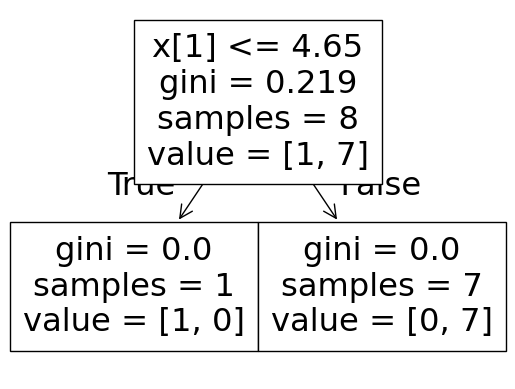

1.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [19]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [20]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
107,2.9,6.3,2
95,3.0,4.2,1
138,3.0,4.8,2
84,3.0,4.5,1
115,3.2,5.3,2
54,2.8,4.6,1
144,3.3,5.7,2
138,3.0,4.8,2


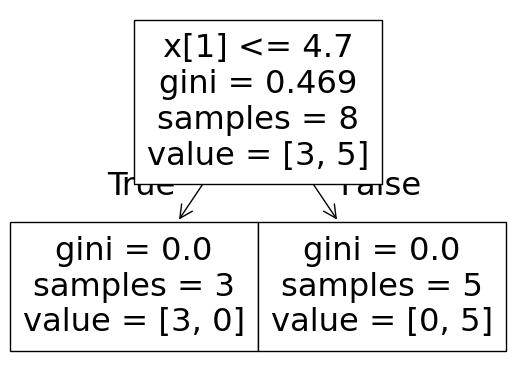

1.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [22]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),target
115,3.2,5.3,2
107,2.9,6.3,2
144,3.3,5.7,2
115,3.2,5.3,2
138,3.0,4.8,2
84,3.0,4.5,1
126,2.8,4.8,2
115,3.2,5.3,2


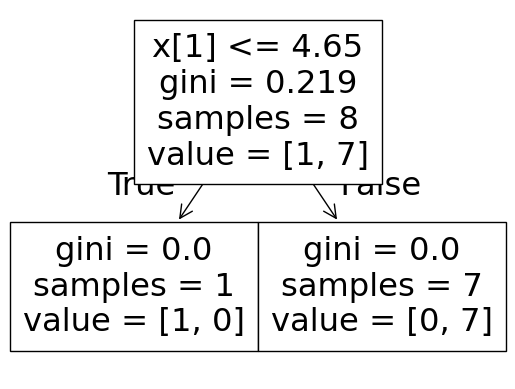

1.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

Predict

In [25]:
df_test

,sepal width (cm),petal length (cm),target
149,3.0,5.1,2
67,2.7,4.1,1
127,3.0,4.9,2
74,2.9,4.3,1
89,2.5,4.0,1


In [26]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pasting another method of baggind, same like before but in this case we do not repeat the rows

In [27]:
df_train

,sepal width (cm),petal length (cm),target
70,3.2,4.8,1
144,3.3,5.7,2
115,3.2,5.3,2
138,3.0,4.8,2
126,2.8,4.8,2
54,2.8,4.6,1
118,2.6,6.9,2
107,2.9,6.3,2
95,3.0,4.2,1
84,3.0,4.5,1


In [28]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
118,2.6,6.9,2
70,3.2,4.8,1
138,3.0,4.8,2
115,3.2,5.3,2
144,3.3,5.7,2
107,2.9,6.3,2
95,3.0,4.2,1
84,3.0,4.5,1


Random Subspaces another method of bagging here we do column sampling
Random Patches where we do both row and column sampling